# exercice: managing catalogs and tables

## astroquery
https://astroquery.readthedocs.io/en/v0.1-0/index.html

In [149]:
%matplotlib notebook
import pylab as pl
from astroquery.vizier import Vizier
import astropy.io
import astropy.units
import astropy.coordinates
import astropy.table
import numpy as np

In [31]:
catalog_list = Vizier.find_catalogs('gaia dr1')
for cat in catalog_list:
    print cat

print type(catalog_list['I/337'])

I/337
I/339
I/340
II/354
J/ApJ/831/L6
J/ApJ/832/L18
J/ApJ/833/119
J/A+A/601/A19
J/A+A/608/A148
J/A+A/608/L8
J/A+A/609/A8
J/A+A/611/A52
J/AJ/153/257
J/AJ/154/256
J/MNRAS/465/3203
J/MNRAS/471/770
J/other/RMxAA/53.439
<class 'astropy.io.votable.tree.Resource'>


VOtables ?? http://docs.astropy.org/en/stable/io/votable/index.html
astropy.io.votable.tree.Resource ?? http://docs.astropy.org/en/stable/api/astropy.io.votable.tree.Resource.html

In [25]:
astropy.io.votable.tree.Resource??

In [32]:
print catalog_list['I/337'].description
print catalog_list['I/337'].infos
print catalog_list['I/337'].params

Gaia DR1 (Gaia Collaboration, 2016)
[<INFO ID="ipopu" name="ipopu" value="0.910773"/>, <INFO ID="cpopu" name="cpopu" value="2631243"/>, <INFO ID="_-kw.Mission" name="-kw.Mission" value="Gaia"/>, <INFO ID="_-kw.Wavelength" name="-kw.Wavelength" value="optical"/>, <INFO ID="_-kw.Astronomy" name="-kw.Astronomy" value="Positional_Data"/>, <INFO ID="_-kw.Astronomy" name="-kw.Astronomy" value="Parallaxes"/>, <INFO ID="_-kw.Astronomy" name="-kw.Astronomy" value="Proper_Motions"/>, <INFO ID="media" name="media" value="timeserie"/>, <INFO ID="media" name="media" value="SED"/>, <INFO ID="_-density" name="-density" value="0"/>]
[]


In [36]:
cats = Vizier.get_catalogs('I/337')
print cats

TableList with 9 tables:
	'0:I/337/gaia' with 14 column(s) and 50 row(s) 
	'1:I/337/tgas' with 20 column(s) and 50 row(s) 
	'2:I/337/tgasptyc' with 22 column(s) and 50 row(s) 
	'3:I/337/varsum' with 3 column(s) and 50 row(s) 
	'4:I/337/cepheid' with 17 column(s) and 50 row(s) 
	'5:I/337/rrlyrae' with 15 column(s) and 50 row(s) 
	'6:I/337/fovparam' with 15 column(s) and 50 row(s) 
	'7:I/337/fov' with 6 column(s) and 50 row(s) 
	'8:I/337/qso' with 13 column(s) and 50 row(s) 


In [111]:
Vizier.ROW_LIMIT = '10000'
cat = Vizier.get_catalogs('I/337/gaia')
print cat

TableList with 1 tables:
	'0:I/337/gaia' with 14 column(s) and 10000 row(s) 


In [112]:
cat_list = Vizier.query_region(astropy.coordinates.ICRS(ra=astropy.coordinates.Angle(299.590, unit=astropy.units.deg),
                                             dec=astropy.coordinates.Angle(35.201, unit=astropy.units.deg)),
                    width="0d15m0s", height="0d15m0s",
                    catalog=["I/337/gaia"])
cat = cat_list[0] # catalog is the first of a list of catalogues

In [113]:
import pandas
print cat
print cat.columns
ra = cat['RA_ICRS']
print ra

   RA_ICRS     e_RA_ICRS    DE_ICRS     ...    e__FG_   __Gmag_      Var     
     deg          mas         deg       ...     e-/s      mag                
-------------- --------- -------------- ... ----------- ------- -------------
299.7415051525     0.814  35.0802664540 ...       1.606  20.047 NOT_AVAILABLE
299.6540886027     0.695  35.0761897449 ...       1.901  19.679 NOT_AVAILABLE
299.6664235636     0.398  35.0823123843 ...       1.912  18.429 NOT_AVAILABLE
299.6648137372     0.290  35.0826202037 ...       2.562  18.273 NOT_AVAILABLE
299.6643030892     0.396  35.0839876920 ...       2.321  18.551 NOT_AVAILABLE
299.6574726725     0.896  35.0792988269 ...       100.5  13.796 NOT_AVAILABLE
299.6637214932     0.201  35.0783755737 ...        3.46  16.977 NOT_AVAILABLE
299.6664484196     1.078  35.0851904869 ...       2.256  19.176 NOT_AVAILABLE
299.6546040543     0.228  35.0782816125 ...       2.459  17.898 NOT_AVAILABLE
299.6647109729     0.367  35.0771460511 ...       3.177  18.169 

In [114]:
# sorting sources by Gmag
cat.sort('__Gmag_')
print cat

   RA_ICRS     e_RA_ICRS    DE_ICRS     ...    e__FG_   __Gmag_      Var     
     deg          mas         deg       ...     e-/s      mag                
-------------- --------- -------------- ... ----------- ------- -------------
299.7171217531     0.149  35.1052137627 ...        1573   9.436 NOT_AVAILABLE
299.5901895869     0.162  35.2168211372 ...        1655   9.863 NOT_AVAILABLE
299.5397031451     0.836  35.3214585525 ...        2001  10.315 NOT_AVAILABLE
299.5884820947     0.133  35.2908597172 ...        1185  10.511 NOT_AVAILABLE
299.4734216914     0.238  35.2988207817 ...        1391  11.220 NOT_AVAILABLE
299.4457657215     0.187  35.1337473845 ...        1334  11.310 NOT_AVAILABLE
299.6620074367     0.148  35.2397128268 ...       274.7  11.374 NOT_AVAILABLE
299.6260599219     0.137  35.1651188705 ...       528.3  11.461 NOT_AVAILABLE
299.4468453064     0.170  35.1349671847 ...       137.9  11.816 NOT_AVAILABLE
299.7317976144     0.057  35.3010648551 ...       249.4  11.955 

In [154]:
# add a column
index_column = astropy.table.Column(np.arange(len(cat)), name='source_index')
cat.add_column(index_column, index=0)  # Insert before the first table column
print cat

source_index    RA_ICRS     e_RA_ICRS ...    e__FG_   __Gmag_      Var     
                  deg          mas    ...     e-/s      mag                
------------ -------------- --------- ... ----------- ------- -------------
           0 299.7171217531     0.149 ...        1573   9.436 NOT_AVAILABLE
           1 299.5901895869     0.162 ...        1655   9.863 NOT_AVAILABLE
           2 299.5397031451     0.836 ...        2001  10.315 NOT_AVAILABLE
           3 299.5884820947     0.133 ...        1185  10.511 NOT_AVAILABLE
           4 299.4734216914     0.238 ...        1391  11.220 NOT_AVAILABLE
           5 299.4457657215     0.187 ...        1334  11.310 NOT_AVAILABLE
           6 299.6620074367     0.148 ...       274.7  11.374 NOT_AVAILABLE
           7 299.6260599219     0.137 ...       528.3  11.461 NOT_AVAILABLE
           8 299.4468453064     0.170 ...       137.9  11.816 NOT_AVAILABLE
           9 299.7317976144     0.057 ...       249.4  11.955 NOT_AVAILABLE
         ...

<IPython.core.display.Javascript object>


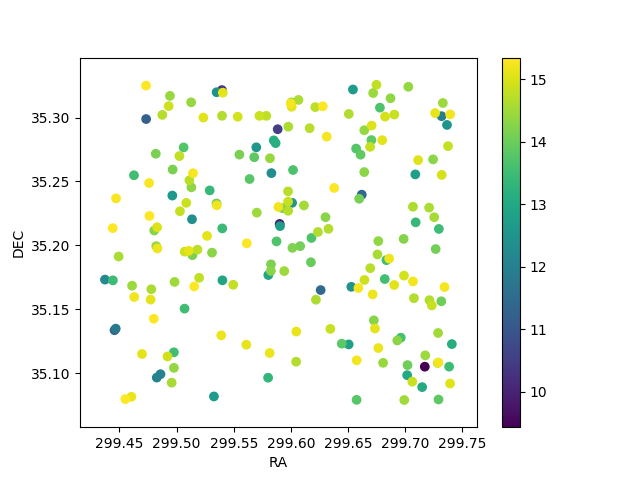

Text(0,0.5,u'DEC')

In [159]:
# displaying the most luminous sources
pl.figure()
pl.scatter(cat['RA_ICRS'][:200], cat['DE_ICRS'][:200], c=cat['__Gmag_'][:200])
pl.colorbar()
pl.xlabel('RA')
pl.ylabel('DEC')

In [90]:
field_image = astropy.io.fits.open('files/gaia_field.fits')[0].data
field_header = astropy.io.fits.open('files/gaia_field.fits')[0].header

In [135]:
ra = cat['RA_ICRS'][:50]
print ra.unit
print list(ra.tolist())

deg
[299.7171217531, 299.5901895869, 299.5397031451, 299.5884820947, 299.4734216914, 299.4457657215, 299.6620074367, 299.6260599219, 299.4468453064, 299.7317976144, 299.4859881329, 299.4827182065, 299.4374115503, 299.582971121, 299.5135417145, 299.5350632393, 299.6528550894, 299.7365380269, 299.6010586062, 299.4963305402, 299.5697694329, 299.6543015254, 299.5327272791, 299.5905119599, 299.7088257637, 299.6505578992, 299.5401200042, 299.5802726748, 299.7017028483, 299.7148118539, 299.5850578056, 299.7407820397, 299.5866646042, 299.5801007012, 299.5290100411, 299.7091454426, 299.5400147866, 299.444334242, 299.7294318869, 299.738411436, 299.6835838729, 299.5070264485, 299.4627811453, 299.4976896648, 299.6821172886, 299.6961355003, 299.6018963871, 299.6778854557, 299.6179824564, 299.5874604895]


<IPython.core.display.Javascript object>


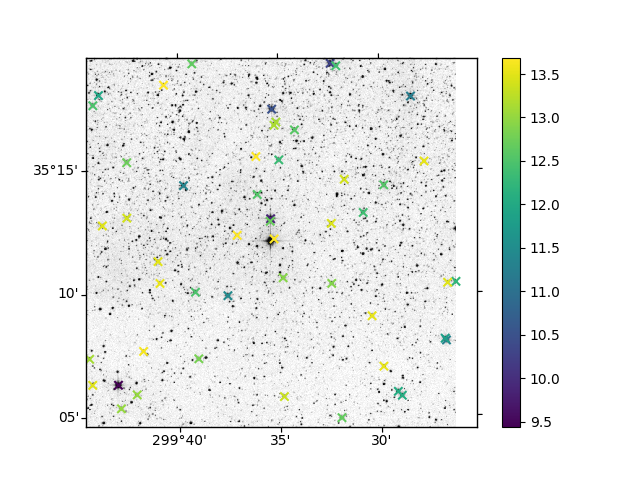

In [172]:
# get wcs from header
wcs = astropy.wcs.WCS(field_header)

fig = pl.figure()
ax = fig.add_subplot(111, projection=wcs)

# plot image
pl.imshow(field_image, origin='bottom-left',
          vmin=np.nanpercentile(field_image, 1),
          vmax=np.nanpercentile(field_image, 99.99),
          cmap='gray_r')

# convert positions in degrees to pixels
pos = wcs.all_world2pix(cat['RA_ICRS'][:50], cat['DE_ICRS'][:50], 0)

# plot stars
pl.scatter(pos[0], pos[1], marker='x', c=cat['__Gmag_'][:50])
pl.colorbar()
